In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
    

In [24]:
# !pip install nba_api

In [4]:
from nba_api.stats.static import players
player_dict = players.get_players()

In [23]:
kyle = [player for player in player_dict if player['full_name'] == 'Kyle Lowry'][0]

kyle_id = kyle['id']
kyle_id

200768

In [154]:
siakam = [player for player in player_dict if player['full_name'] == 'Pascal Siakam'][0]

siakam_id = siakam['id']
siakam_id

1627783

In [156]:
powell = [player for player in player_dict if player['full_name'] == 'Norman Powell'][0]

powell_id = powell['id']
powell_id

1626181

In [158]:
fvv = [player for player in player_dict if player['full_name'] == 'Fred VanVleet'][0]

fvv_id = fvv['id']
fvv_id

1627832

In [25]:
from nba_api.stats.static import teams 

In [26]:
teams = teams.get_teams()
RAPS = [x for x in teams if x['full_name'] == 'Toronto Raptors'][0]
RAPS_id = RAPS['id']
RAPS_id

1610612761

In [53]:
RAPS

{'id': 1610612761,
 'full_name': 'Toronto Raptors',
 'abbreviation': 'TOR',
 'nickname': 'Raptors',
 'city': 'Toronto',
 'state': 'Ontario',
 'year_founded': 1995}

In [27]:
from nba_api.stats.endpoints import shotchartdetail

In [87]:
kyle_shotchart = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id=kyle_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',)
df_kyle_sc = kyle_shotchart.get_data_frames()[0]

In [90]:
df_kyle_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            741 non-null    object
 1   GAME_ID              741 non-null    object
 2   GAME_EVENT_ID        741 non-null    int64 
 3   PLAYER_ID            741 non-null    int64 
 4   PLAYER_NAME          741 non-null    object
 5   TEAM_ID              741 non-null    int64 
 6   TEAM_NAME            741 non-null    object
 7   PERIOD               741 non-null    int64 
 8   MINUTES_REMAINING    741 non-null    int64 
 9   SECONDS_REMAINING    741 non-null    int64 
 10  EVENT_TYPE           741 non-null    object
 11  ACTION_TYPE          741 non-null    object
 12  SHOT_TYPE            741 non-null    object
 13  SHOT_ZONE_BASIC      741 non-null    object
 14  SHOT_ZONE_AREA       741 non-null    object
 15  SHOT_ZONE_RANGE      741 non-null    object
 16  SHOT_DIS

In [91]:
df_kyle_sc.to_csv('/Users/Home/Desktop/SFU/python/nbaProject/kyle_sc_full.csv')

# Extracting made FGAs & ~made FGAs

In [102]:
shots_made = df_kyle_sc[df_kyle_sc['SHOT_MADE_FLAG'] == 1]
shots_not_made = df_kyle_sc[df_kyle_sc['SHOT_MADE_FLAG'] == 0]

In [103]:
print(shots_made.shape)
print(shots_not_made.shape)

(309, 24)
(432, 24)


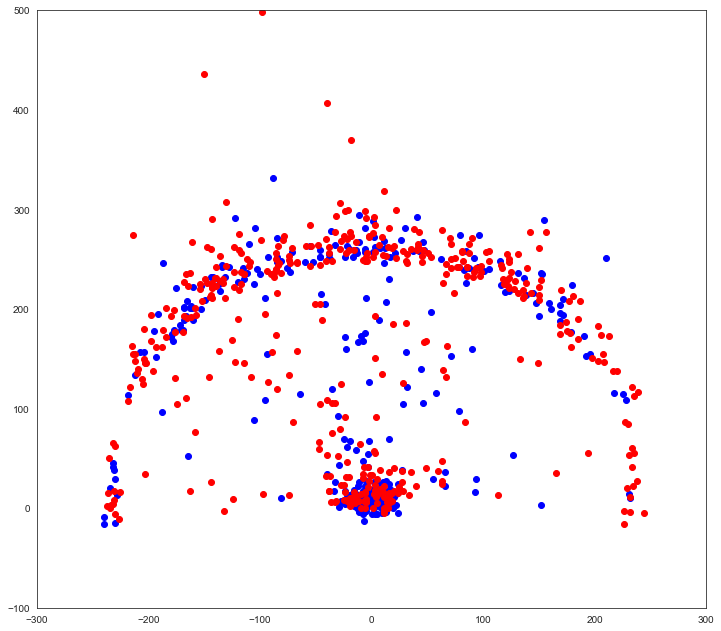

In [105]:
# plt.scatter(sc_x, sc_y, c='blue', alpha=0.5)
# plt.show()

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="blue")
plt.scatter(shots_not_made.LOC_X, shots_not_made.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Function to draw court

In [97]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax
# http://savvastjortjoglou.com/nba-shot-sharts.html

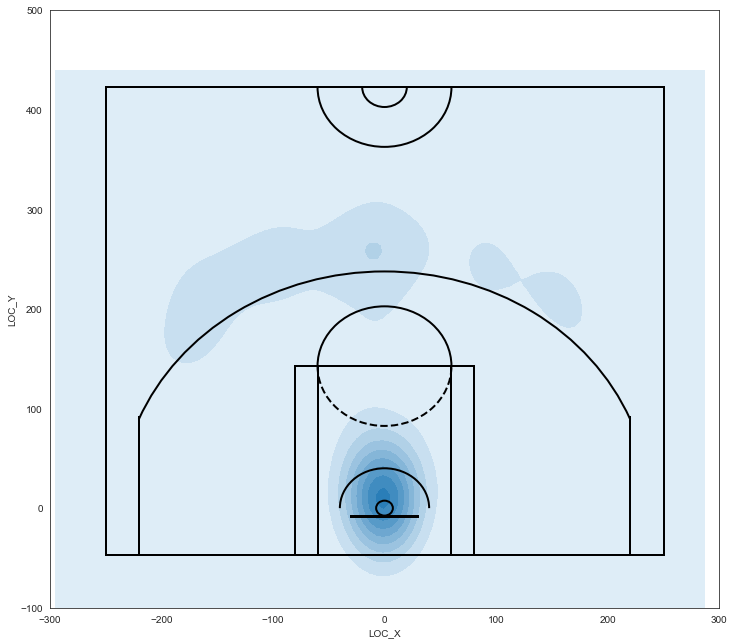

In [120]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="blue")
# plt.scatter(shots_not_made.LOC_X, shots_not_made.LOC_Y, c="red")
sns.kdeplot(shots_made.LOC_X, shots_made.LOC_Y, shade='T')
# sns.kdeplot(shots_not_made.LOC_X, shots_not_made.LOC_Y, shade='True')
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

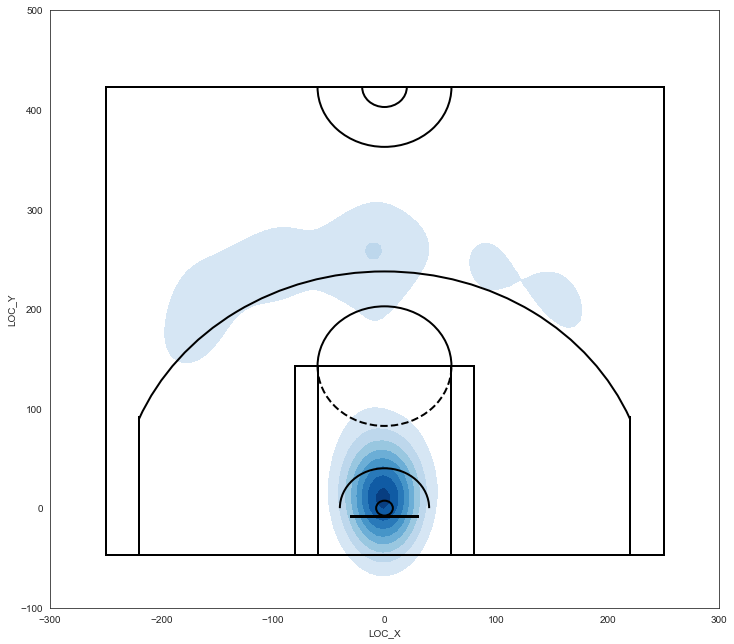

In [125]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="blue")
# plt.scatter(shots_not_made.LOC_X, shots_not_made.LOC_Y, c="red")
sns.kdeplot(shots_made.LOC_X, shots_made.LOC_Y, cmap='Blues', shade='True', shade_lowest=False)
# sns.kdeplot(shots_not_made.LOC_X, shots_not_made.LOC_Y, cmap='Blues', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Is Klow clutch?

Last 5 min

In [126]:
kyle_shotchart_clutch = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id=kyle_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA', clutch_time_nullable='Last 5 Minutes')
df_kyle_sc_clutch = kyle_shotchart_clutch.get_data_frames()[0]

In [131]:
df_kyle_sc_clutch.shape

(92, 24)

In [129]:
shots_made_clutch_5 = df_kyle_sc_clutch[df_kyle_sc['SHOT_MADE_FLAG'] == 1]
shots_not_made_clutch_5 = df_kyle_sc_clutch[df_kyle_sc['SHOT_MADE_FLAG'] == 0]

/Users/Home/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/Home/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [130]:
print(shots_made_clutch_5.shape)
print(shots_not_made_clutch_5.shape)
# 46.8%

(43, 24)
(49, 24)


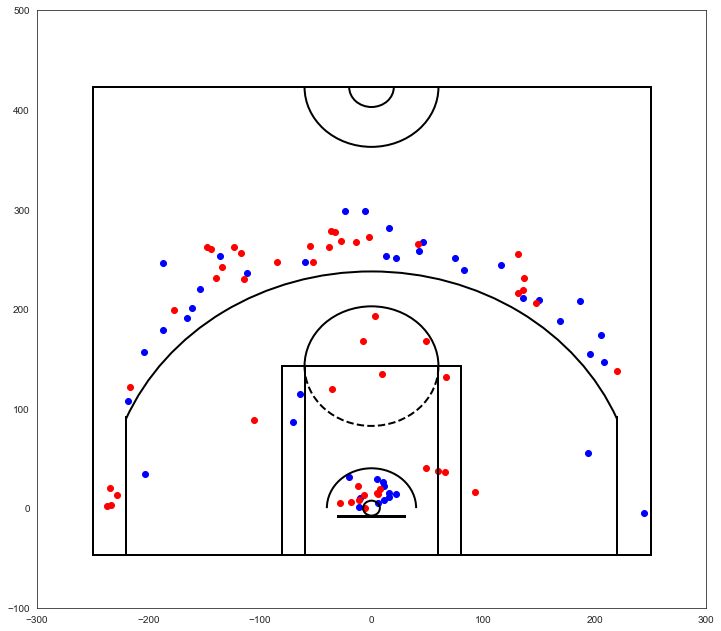

In [136]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(shots_made_clutch_5.LOC_X, shots_made_clutch_5.LOC_Y, c="blue")
plt.scatter(shots_not_made_clutch_5.LOC_X, shots_not_made_clutch_5.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

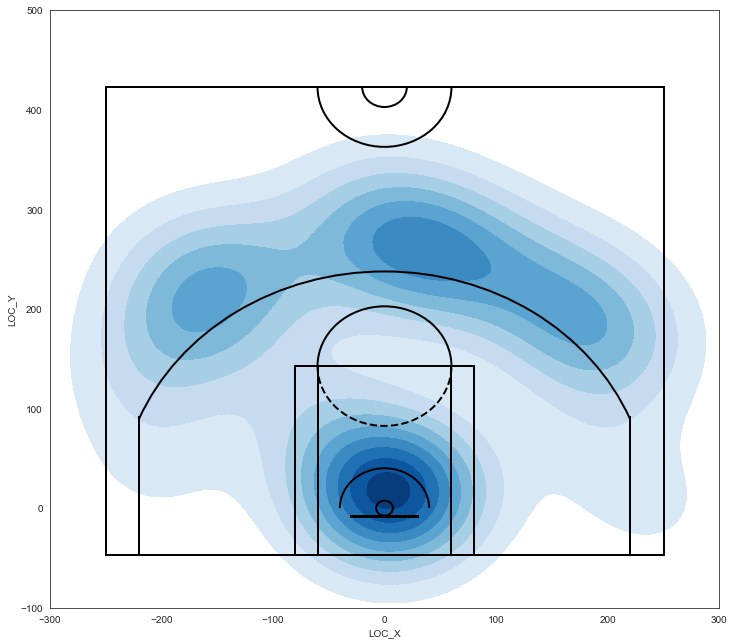

In [133]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
sns.kdeplot(shots_made_clutch_5.LOC_X, shots_made_clutch_5.LOC_Y, cmap='Blues', shade='True', shade_lowest=False)
# sns.kdeplot(shots_not_made_clutch_5.LOC_X, shots_not_made_clutch_5.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

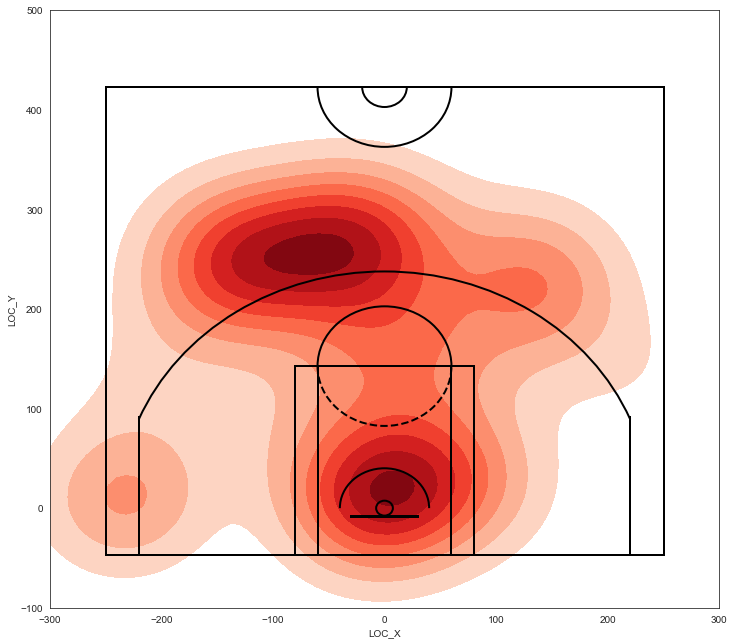

In [134]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
# sns.kdeplot(shots_made_clutch_5.LOC_X, shots_made_clutch_5.LOC_Y, cmap='Blues', shade='True', shade_lowest=False)
sns.kdeplot(shots_not_made_clutch_5.LOC_X, shots_not_made_clutch_5.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Last 1 Minute

In [137]:
kyle_shotchart_clutch_1 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id=kyle_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA', clutch_time_nullable='Last 1 Minute')
df_kyle_sc_clutch_1 = kyle_shotchart_clutch_1.get_data_frames()[0]

In [150]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [151]:
df_kyle_sc_clutch_1.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900001,793,200768,Kyle Lowry,1610612761,Toronto Raptors,5,0,56,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,147,206,1,1,20191022,TOR,NOP
1,Shot Chart Detail,0021900044,654,200768,Kyle Lowry,1610612761,Toronto Raptors,4,0,45,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,67,132,1,0,20191028,TOR,ORL
2,Shot Chart Detail,0021900082,698,200768,Kyle Lowry,1610612761,Toronto Raptors,4,0,24,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-10,10,1,1,20191102,MIL,TOR
3,Shot Chart Detail,0021900338,650,200768,Kyle Lowry,1610612761,Toronto Raptors,4,0,42,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,28,16,281,1,0,20191208,PHI,TOR
4,Shot Chart Detail,0021900345,655,200768,Kyle Lowry,1610612761,Toronto Raptors,4,0,50,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-11,8,1,1,20191209,CHI,TOR


In [139]:
shots_made_clutch_1 = df_kyle_sc_clutch_1[df_kyle_sc['SHOT_MADE_FLAG'] == 1]
shots_not_made_clutch_1 = df_kyle_sc_clutch_1[df_kyle_sc['SHOT_MADE_FLAG'] == 0]

/Users/Home/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/Home/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [140]:
print(shots_made_clutch_1.shape)
print(shots_not_made_clutch_1.shape)
# 31.8% FG

(7, 24)
(15, 24)


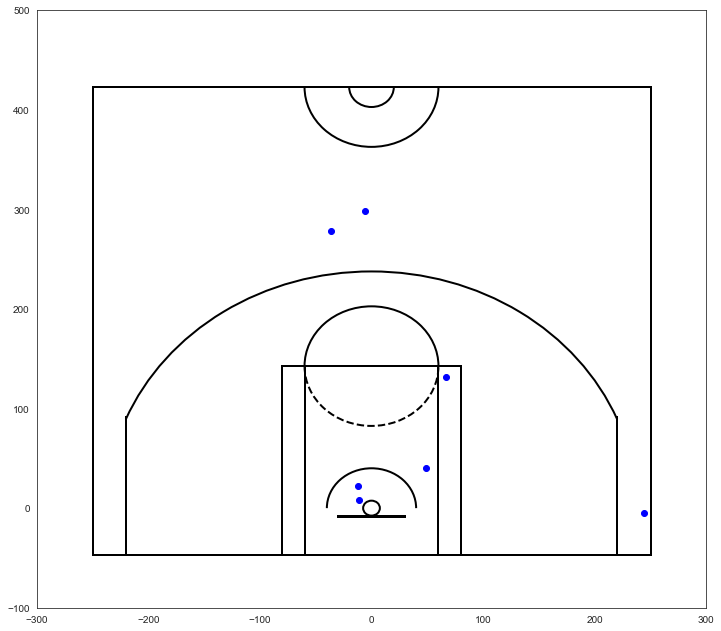

In [142]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(shots_made_clutch_1.LOC_X, shots_made_clutch_1.LOC_Y, c="blue")
# sns.kdeplot(shots_made_clutch_1.LOC_X, shots_made_clutch_1.LOC_Y, cmap='Blues', shade='True', shade_lowest=False)
# sns.kdeplot(shots_not_made_clutch_5.LOC_X, shots_not_made_clutch_5.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Norman Powell -> UTG

In [161]:
powell_shotchart = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= powell_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA')
df_powell_sc = powell_shotchart.get_data_frames()[0]

In [168]:
df_powell_sc.shape

(516, 24)

In [165]:
powell_shots_made = df_powell_sc[df_powell_sc['SHOT_MADE_FLAG'] == 1]
powell_shots_not_made = df_powell_sc[df_powell_sc['SHOT_MADE_FLAG'] == 0]

In [167]:
print(powell_shots_made.shape)
print(powell_shots_not_made.shape)
# 50.2% FGM

(259, 24)
(257, 24)


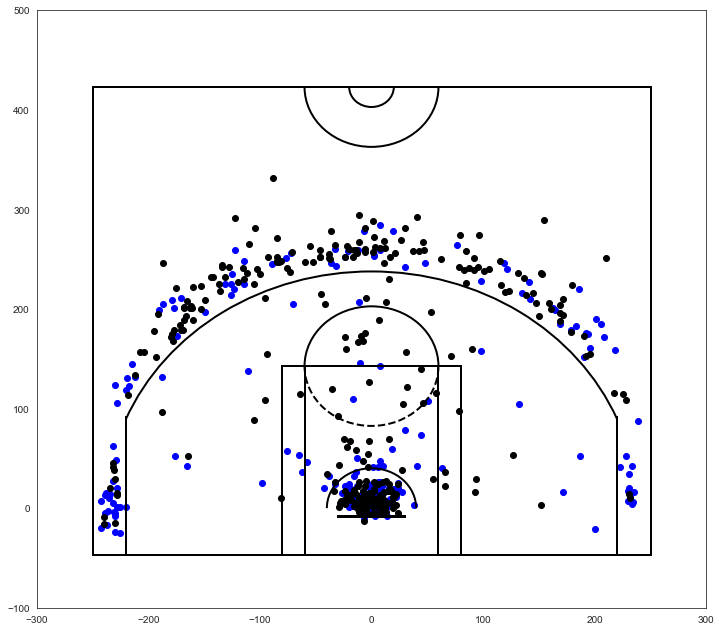

In [179]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(powell_shots_made.LOC_X, powell_shots_made.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
# plt.scatter(powell_shots_not_made.LOC_X, powell_shots_not_made.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

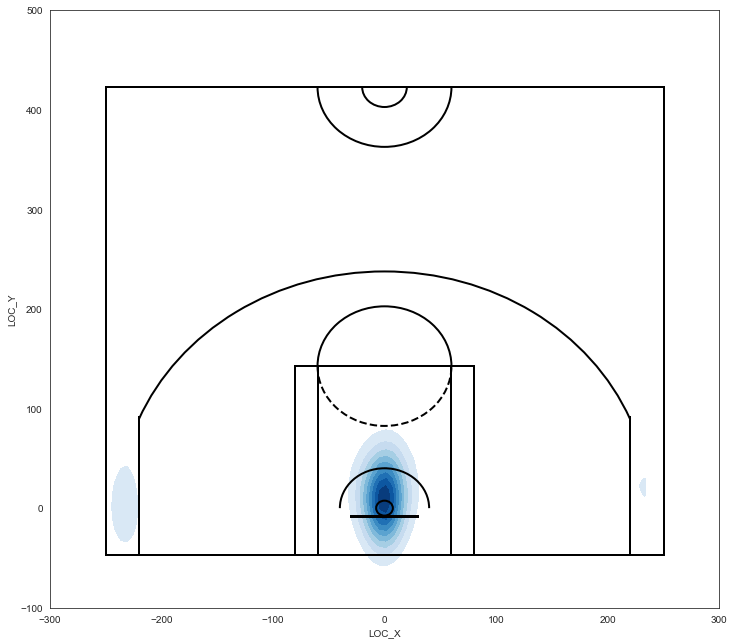

In [176]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
sns.kdeplot(powell_shots_made.LOC_X, powell_shots_made.LOC_Y, cmap='Blues', shade='True', shade_lowest=False)
# sns.kdeplot(powell_shots_not_made.LOC_X, powell_shots_not_made.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Seems like Norman Powell would become much deadlier if he has a mid range shot

# Is Powell Clutch?

In [180]:
powell_shotchart_clutch_5 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= powell_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',clutch_time_nullable='Last 5 Minutes')
df_powell_sc_clutch_5 = powell_shotchart_clutch_5.get_data_frames()[0]

In [193]:
# display(df_powell_sc_clutch_5)
df_powell_sc_clutch_5.shape

(42, 24)

In [183]:
powell_shots_made_clutch_5 = df_powell_sc_clutch_5[df_powell_sc_clutch_5['SHOT_MADE_FLAG'] == 1]
powell_shots_not_made_clutch_5 = df_powell_sc_clutch_5[df_powell_sc_clutch_5['SHOT_MADE_FLAG'] == 0]

In [189]:
print(powell_shots_made_clutch_5.shape)
print(powell_shots_not_made_clutch_5.shape)
# 57% FGM in clutch time!!

(24, 24)
(18, 24)


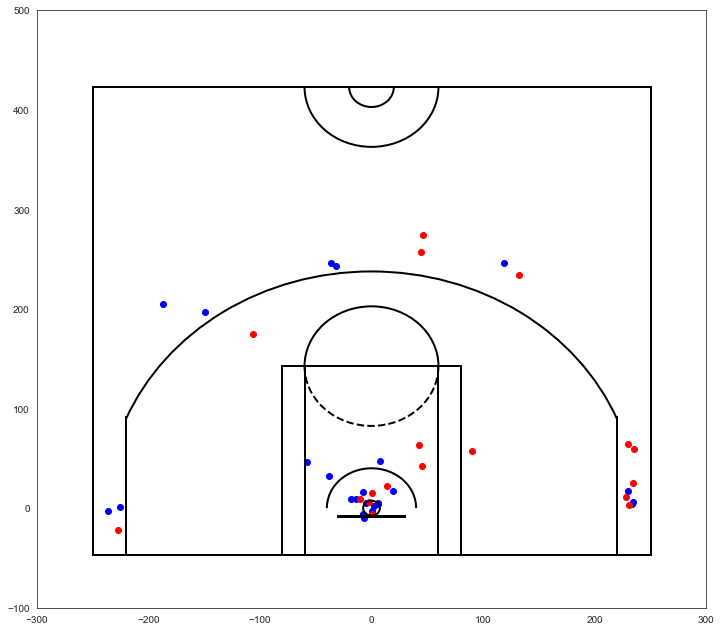

In [191]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(powell_shots_made_clutch_5.LOC_X, powell_shots_made_clutch_5.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
plt.scatter(powell_shots_not_made_clutch_5.LOC_X, powell_shots_not_made_clutch_5.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [194]:
powell_shotchart_clutch_1 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= powell_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',clutch_time_nullable='Last 1 Minute')
df_powell_sc_clutch_1 = powell_shotchart_clutch_1.get_data_frames()[0]

In [195]:
df_powell_sc_clutch_1.shape

(10, 24)

In [196]:
powell_shots_made_clutch_1 = df_powell_sc_clutch_1[df_powell_sc_clutch_1['SHOT_MADE_FLAG'] == 1]
powell_shots_not_made_clutch_1 = df_powell_sc_clutch_1[df_powell_sc_clutch_1['SHOT_MADE_FLAG'] == 0]

In [197]:
print(powell_shots_made_clutch_1.shape)
print(powell_shots_not_made_clutch_1.shape)
# 40% FGM in the last minute!!

(4, 24)
(6, 24)


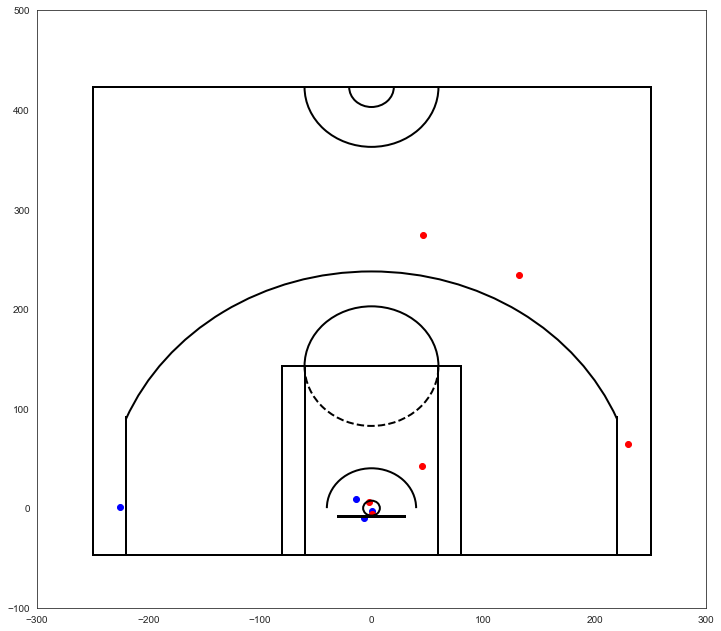

In [198]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(powell_shots_made_clutch_1.LOC_X, powell_shots_made_clutch_1.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
plt.scatter(powell_shots_not_made_clutch_1.LOC_X, powell_shots_not_made_clutch_1.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Siakam -> SpicyPPPPPP

In [199]:
siakam_shotchart = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= siakam_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA')
df_siakam_sc = siakam_shotchart.get_data_frames()[0]

In [200]:
df_siakam_sc.shape

(1000, 24)

In [201]:
siakam_shots_made = df_siakam_sc[df_siakam_sc['SHOT_MADE_FLAG'] == 1]
siakam_shots_not_made = df_siakam_sc[df_siakam_sc['SHOT_MADE_FLAG'] == 0]

In [203]:
print(siakam_shots_made.shape)
print(siakam_shots_not_made.shape)
# 45.9% FGM

(459, 24)
(541, 24)


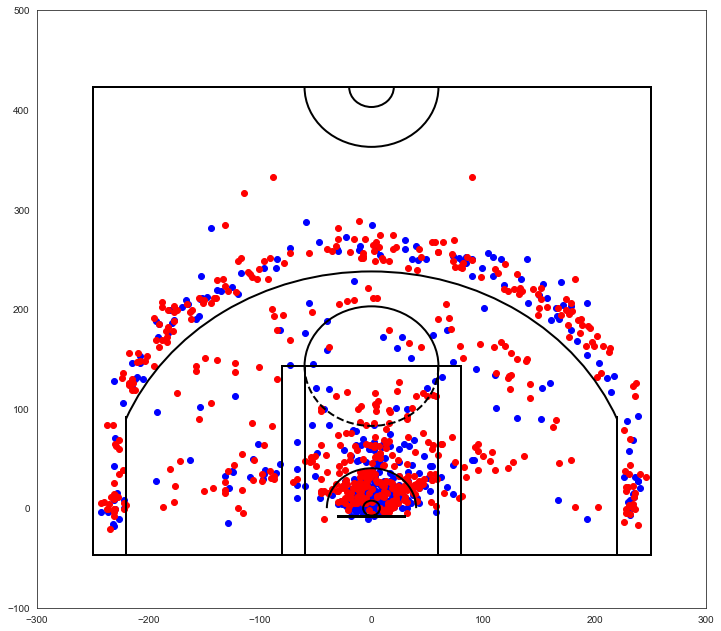

In [208]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(siakam_shots_made.LOC_X, siakam_shots_made.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
plt.scatter(siakam_shots_not_made.LOC_X, siakam_shots_not_made.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

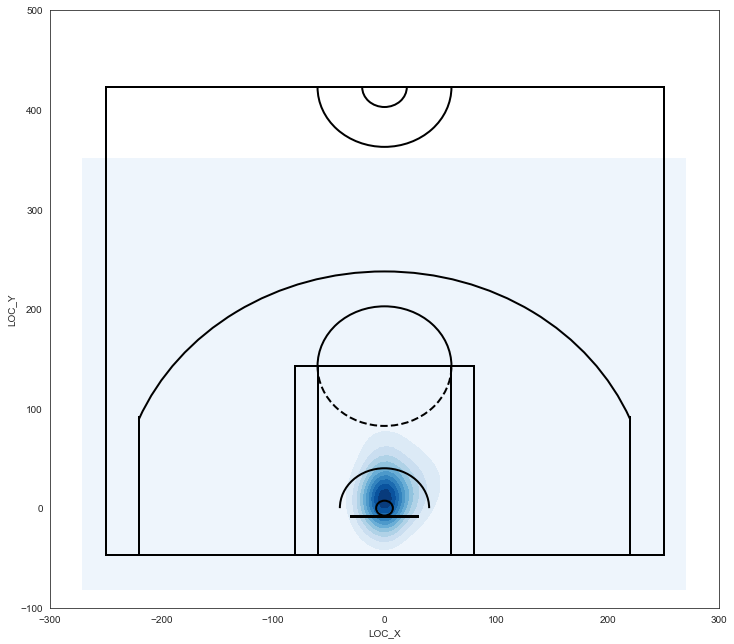

In [206]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
sns.kdeplot(siakam_shots_made.LOC_X, siakam_shots_made.LOC_Y, cmap='Blues', shade='True', shade_lowest=True)
# sns.kdeplot(powell_shots_not_made.LOC_X, powell_shots_not_made.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

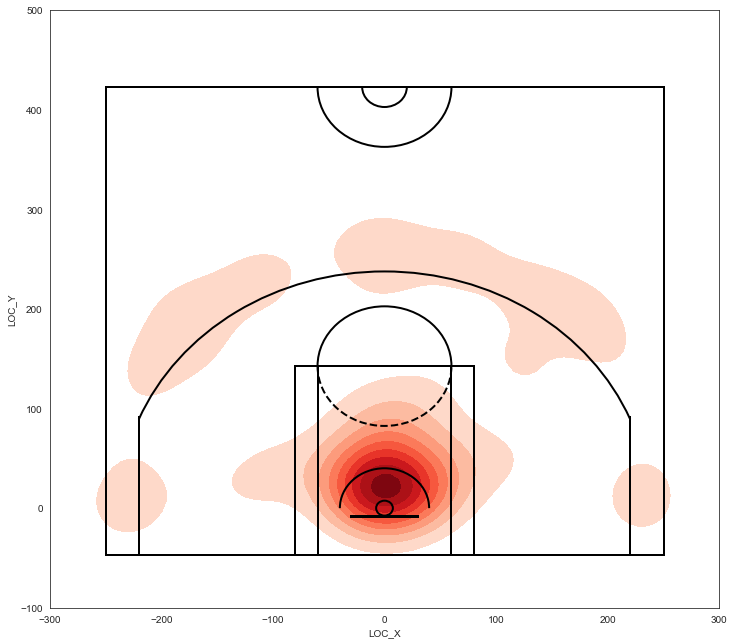

In [209]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
# sns.kdeplot(siakam_shots_made.LOC_X, siakam_shots_made.LOC_Y, cmap='Blues', shade='True', shade_lowest=True)
sns.kdeplot(siakam_shots_not_made.LOC_X, siakam_shots_not_made.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Is Siakam clutch?

In [210]:
siakam_shotchart_clutch_5 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= siakam_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',clutch_time_nullable='Last 5 Minutes')
df_siakam_sc_clutch_5 = siakam_shotchart_clutch_5.get_data_frames()[0]

In [211]:
df_siakam_sc_clutch_5.shape

(126, 24)

In [212]:
siakam_shots_made_clutch_5 = df_siakam_sc_clutch_5[df_siakam_sc_clutch_5['SHOT_MADE_FLAG'] == 1]
siakam_shots_not_made_clutch_5 = df_siakam_sc_clutch_5[df_siakam_sc_clutch_5['SHOT_MADE_FLAG'] == 0]

In [213]:
print(siakam_shots_made_clutch_5.shape)
print(siakam_shots_not_made_clutch_5.shape)
# 50% FGM in the last 5 min

(63, 24)
(63, 24)


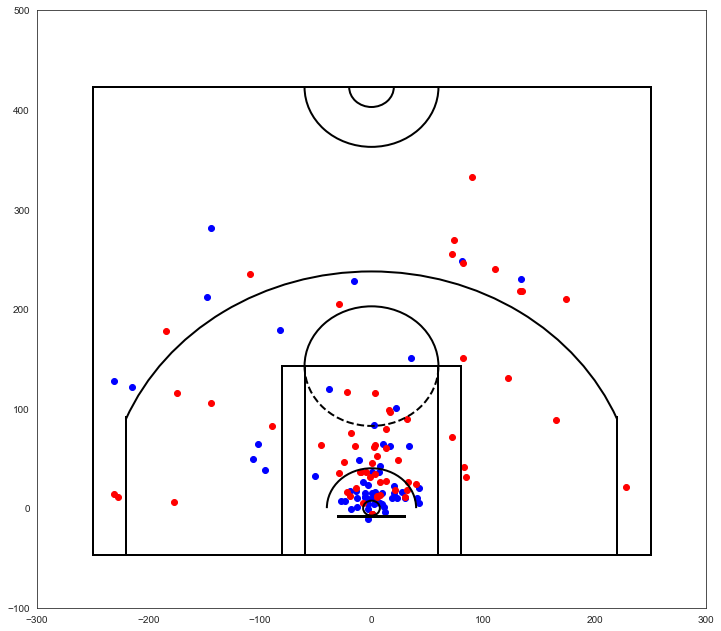

In [214]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(siakam_shots_made_clutch_5.LOC_X, siakam_shots_made_clutch_5.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
plt.scatter(siakam_shots_not_made_clutch_5.LOC_X, siakam_shots_not_made_clutch_5.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Siakam tends to take less 3pt shot in clutch time

In [215]:
siakam_shotchart_clutch_1 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= siakam_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',clutch_time_nullable='Last 1 Minute')
df_siakam_sc_clutch_1 = siakam_shotchart_clutch_1.get_data_frames()[0]

In [216]:
df_siakam_sc_clutch_1.shape
# wow, just 19 touches in the last minute..
# powell got 10 touches in the last minute and he missed a ton of games
# most likely that siakam is covered during the last minute

(19, 24)

In [217]:
siakam_shots_made_clutch_1 = df_siakam_sc_clutch_1[df_siakam_sc_clutch_1['SHOT_MADE_FLAG'] == 1]
siakam_shots_not_made_clutch_1 = df_siakam_sc_clutch_1[df_siakam_sc_clutch_1['SHOT_MADE_FLAG'] == 0]

In [218]:
print(siakam_shots_made_clutch_1.shape)
print(siakam_shots_not_made_clutch_1.shape)
# 52.6% FGM -> even better than the last 5 minutes, but not enough data to make a conclusion

(10, 24)
(9, 24)


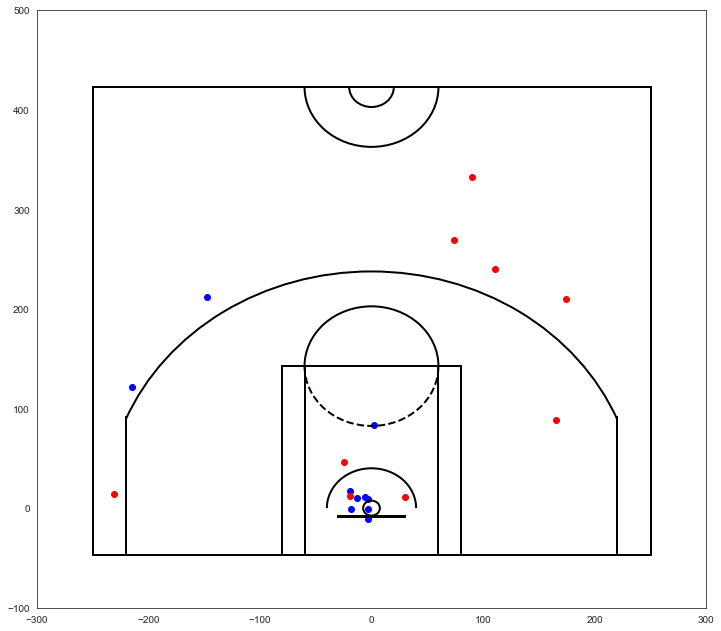

In [219]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(siakam_shots_made_clutch_1.LOC_X, siakam_shots_made_clutch_1.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
plt.scatter(siakam_shots_not_made_clutch_1.LOC_X, siakam_shots_not_made_clutch_1.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

Siakam is not a great clutch 3 pt shooter for this season so far.. 28.6% FGM; however, he is great at finishing at the rim

# FVV -> Bet On Yourself

In [220]:
fvv_shotchart = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= fvv_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA')
df_fvv_sc = fvv_shotchart.get_data_frames()[0]

In [221]:
df_fvv_sc.shape

(701, 24)

In [222]:
fvv_shots_made = df_fvv_sc[df_fvv_sc['SHOT_MADE_FLAG'] == 1]
fvv_shots_not_made = df_fvv_sc[df_fvv_sc['SHOT_MADE_FLAG'] == 0]

In [223]:
print(fvv_shots_made.shape)
print(fvv_shots_not_made.shape)
# 40.9% FGM

(287, 24)
(414, 24)


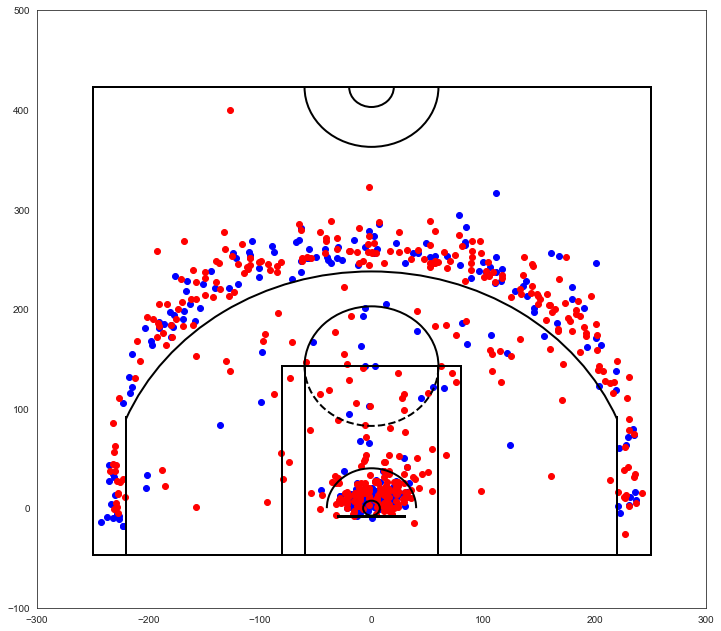

In [224]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(fvv_shots_made.LOC_X, fvv_shots_made.LOC_Y, c="blue")
# plt.scatter(shots_made.LOC_X, shots_made.LOC_Y, c="black") #Mapping klow with powell
plt.scatter(fvv_shots_not_made.LOC_X, fvv_shots_not_made.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

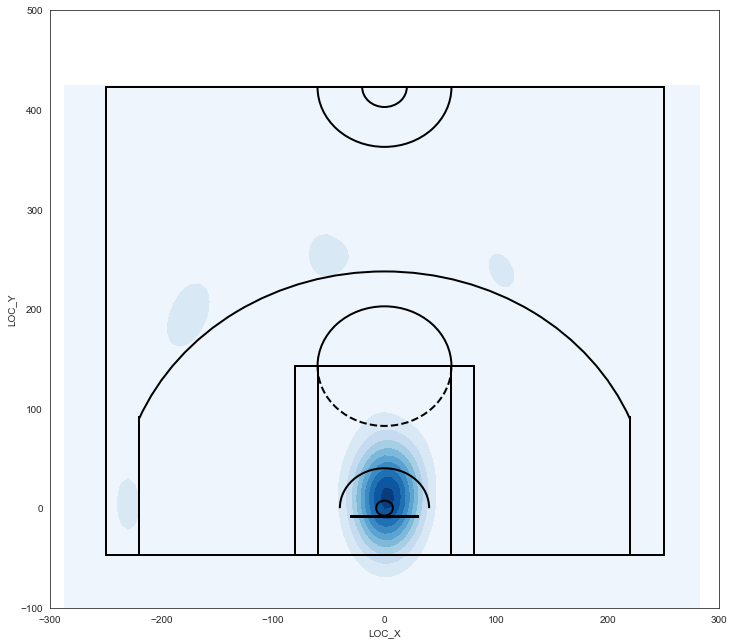

In [227]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
sns.kdeplot(fvv_shots_made.LOC_X, fvv_shots_made.LOC_Y, cmap='Blues', shade='True', shade_lowest=True)
# sns.kdeplot(fvv_shots_not_made.LOC_X, fvv_shots_not_made.LOC_Y, cmap='Reds', shade='True', shade_lowest=False)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Is Fred clutch?

In [228]:
fvv_shotchart_clutch_5 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= fvv_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',clutch_time_nullable='Last 5 Minutes')
df_fvv_sc_clutch_5 = fvv_shotchart_clutch_5.get_data_frames()[0]

In [229]:
df_fvv_sc_clutch_5.shape

(69, 24)

In [230]:
fvv_shots_made_clutch_5 = df_fvv_sc_clutch_5[df_fvv_sc_clutch_5['SHOT_MADE_FLAG'] == 1]
fvv_shots_not_made_clutch_5 = df_fvv_sc_clutch_5[df_fvv_sc_clutch_5['SHOT_MADE_FLAG'] == 0]

In [251]:
# 3pts in last 5 min
fvv_shots_made_clutch_3pt_5 = df_fvv_sc_clutch_5[(df_fvv_sc_clutch_5['SHOT_TYPE'] == '3PT Field Goal') & (df_fvv_sc_clutch_5['SHOT_MADE_FLAG'] == 1)]
fvv_shots_not_made_clutch_3pt_5 = df_fvv_sc_clutch_5[(df_fvv_sc_clutch_5['SHOT_TYPE'] == '3PT Field Goal') & (df_fvv_sc_clutch_5['SHOT_MADE_FLAG'] == 0)]

In [231]:
print(fvv_shots_made_clutch_5.shape)
print(fvv_shots_not_made_clutch_5.shape)
# 36% FGM in the last 5 min

(25, 24)
(44, 24)


In [252]:
print(fvv_shots_made_clutch_3pt_5.shape)
print(fvv_shots_not_made_clutch_3pt_5.shape)
# 35% 3pt FGM in the last 5 min; 57% of Fred's shot in the last five min are 3pt attempts, of which he makes 35% -> makes 20% of made shots are 3pts

(14, 24)
(26, 24)


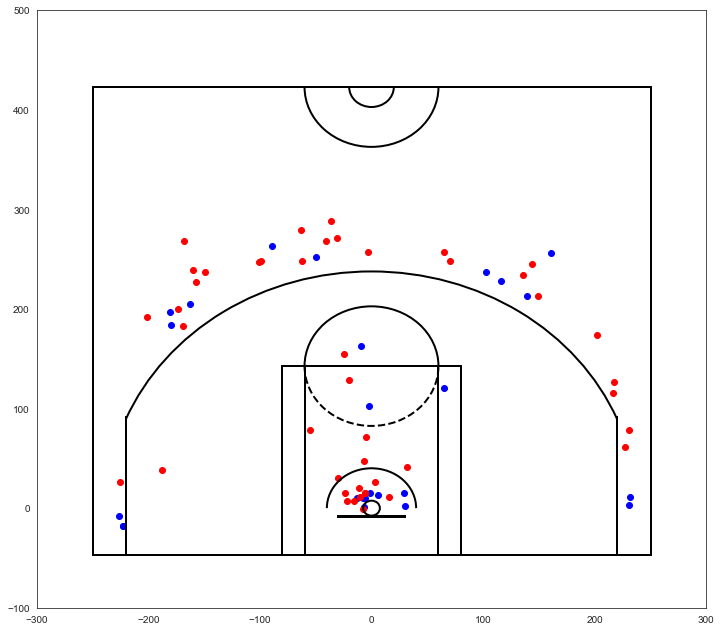

In [232]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(fvv_shots_made_clutch_5.LOC_X, fvv_shots_made_clutch_5.LOC_Y, c="blue")
plt.scatter(fvv_shots_not_made_clutch_5.LOC_X, fvv_shots_not_made_clutch_5.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

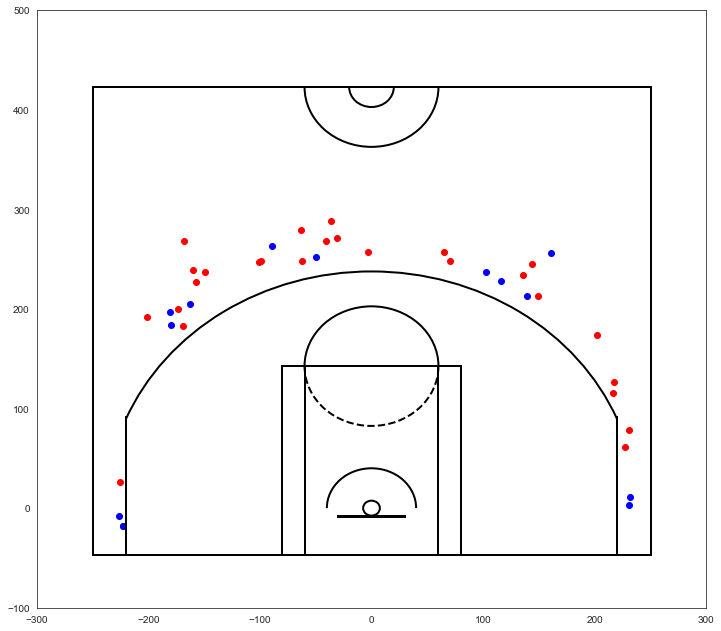

In [253]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(fvv_shots_made_clutch_3pt_5.LOC_X, fvv_shots_made_clutch_3pt_5.LOC_Y, c="blue")
plt.scatter(fvv_shots_not_made_clutch_3pt_5.LOC_X, fvv_shots_not_made_clutch_3pt_5.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

High volume of 3pt shots, even though Fred takes less shots, he shoots more 3s and improves spacing

In [233]:
fvv_shotchart_clutch_1 = shotchartdetail.ShotChartDetail(team_id = RAPS_id, player_id= fvv_id, date_from_nullable='2019-10-22', context_measure_simple = 'FGA',clutch_time_nullable='Last 1 Minute')
df_fvv_sc_clutch_1 = fvv_shotchart_clutch_1.get_data_frames()[0]

In [234]:
df_fvv_sc_clutch_1.shape

(11, 24)

In [235]:
fvv_shots_made_clutch_1 = df_fvv_sc_clutch_1[df_fvv_sc_clutch_1['SHOT_MADE_FLAG'] == 1]
fvv_shots_not_made_clutch_1 = df_fvv_sc_clutch_1[df_fvv_sc_clutch_1['SHOT_MADE_FLAG'] == 0]

In [237]:
print(fvv_shots_made_clutch_1.shape)
print(fvv_shots_not_made_clutch_1.shape)
# 9.09% FGM in the last 1 min off

(1, 24)
(10, 24)


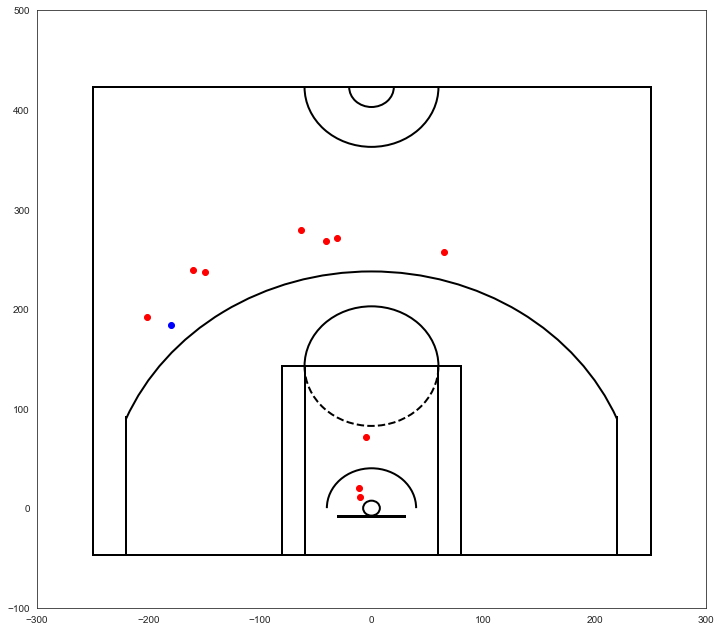

In [238]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(fvv_shots_made_clutch_1.LOC_X, fvv_shots_made_clutch_1.LOC_Y, c="blue")
plt.scatter(fvv_shots_not_made_clutch_1.LOC_X, fvv_shots_not_made_clutch_1.LOC_Y, c="red")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [239]:
df_fvv_sc_clutch_1

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900001,798,1627832,Fred VanVleet,1610612761,Toronto Raptors,5,0,18,Missed Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-10,11,1,0,20191022,TOR,NOP
1,Shot Chart Detail,0021900145,664,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,29,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-160,239,1,0,20191111,LAC,TOR
2,Shot Chart Detail,0021900246,627,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,18,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-5,71,1,0,20191125,TOR,PHI
3,Shot Chart Detail,0021900269,654,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,42,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-11,20,1,0,20191129,ORL,TOR
4,Shot Chart Detail,0021900301,715,1627832,Fred VanVleet,1610612761,Toronto Raptors,5,0,25,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,28,-63,279,1,0,20191203,TOR,MIA
5,Shot Chart Detail,0021900446,626,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,55,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,65,257,1,0,20191223,IND,TOR
6,Shot Chart Detail,0021900446,699,1627832,Fred VanVleet,1610612761,Toronto Raptors,5,0,5,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-149,237,1,0,20191223,IND,TOR
7,Shot Chart Detail,0021900486,606,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,16,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-31,271,1,0,20191229,TOR,OKC
8,Shot Chart Detail,0021900686,651,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,41,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-180,184,1,1,20200126,SAS,TOR
9,Shot Chart Detail,0021900686,658,1627832,Fred VanVleet,1610612761,Toronto Raptors,4,0,22,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-41,268,1,0,20200126,SAS,TOR


In [249]:
fvv_shots_made_clutch_3pt_1 = df_fvv_sc_clutch_1[(df_fvv_sc_clutch_1['SHOT_TYPE'] == '3PT Field Goal') & (df_fvv_sc_clutch_1['SHOT_MADE_FLAG'] == 1)]
fvv_shots_not_made_clutch_3pt_1 = df_fvv_sc_clutch_1[(df_fvv_sc_clutch_1['SHOT_TYPE'] == '3PT Field Goal') & (df_fvv_sc_clutch_1['SHOT_MADE_FLAG'] == 0)]

In [250]:
display(fvv_shots_made_clutch_3pt_1.shape)
display(fvv_shots_not_made_clutch_3pt_1.shape)
# 12.5% 3pt FGM

(1, 24)

(7, 24)

In [242]:
df_fvv_sc_clutch_1.shape

(11, 24)